<a href="https://colab.research.google.com/github/annisakrnn/PCVK_Genap_2025/blob/main/Week5_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D-1 PERCOBAAN HISTOGRAM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi“Week5_NoAbsen.ipynb”.  

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.  

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [13]:
import cv2 as cv
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import math
import os
import glob

3. Membuat histogram citra seperti berdasarkan flowchart di bawah ini : (Gunakan
gambar lena.jpg)

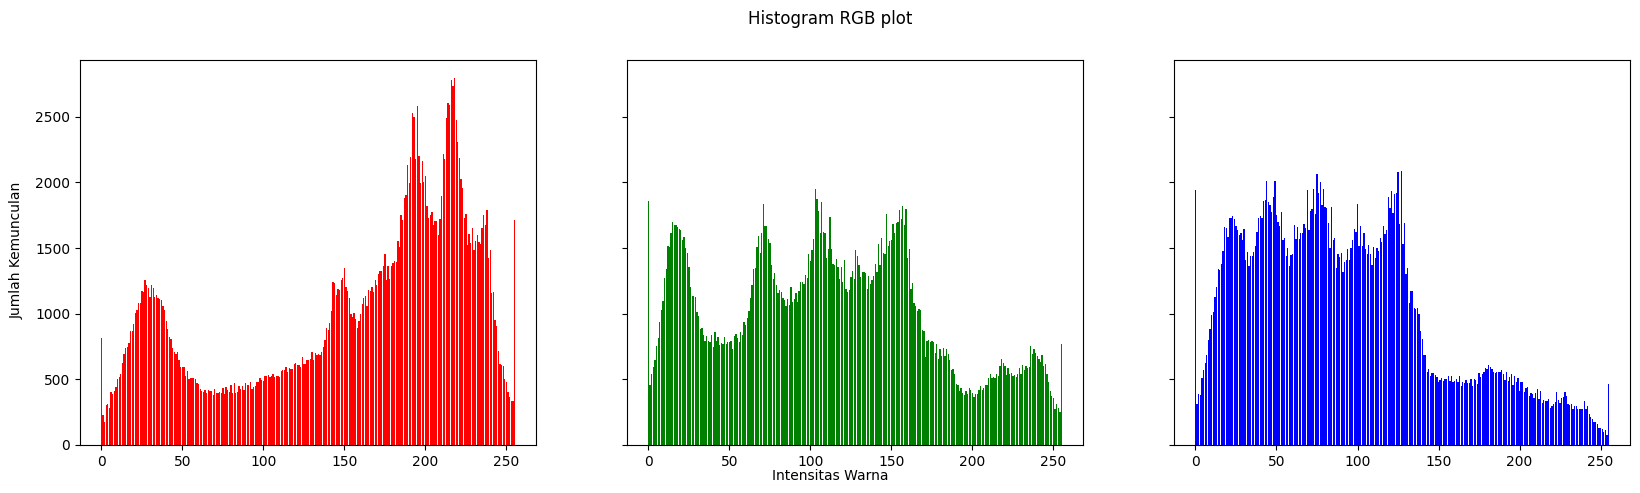

In [14]:
#membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')
plt.show()

# PERTANYAAN PRAKTIKUM D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

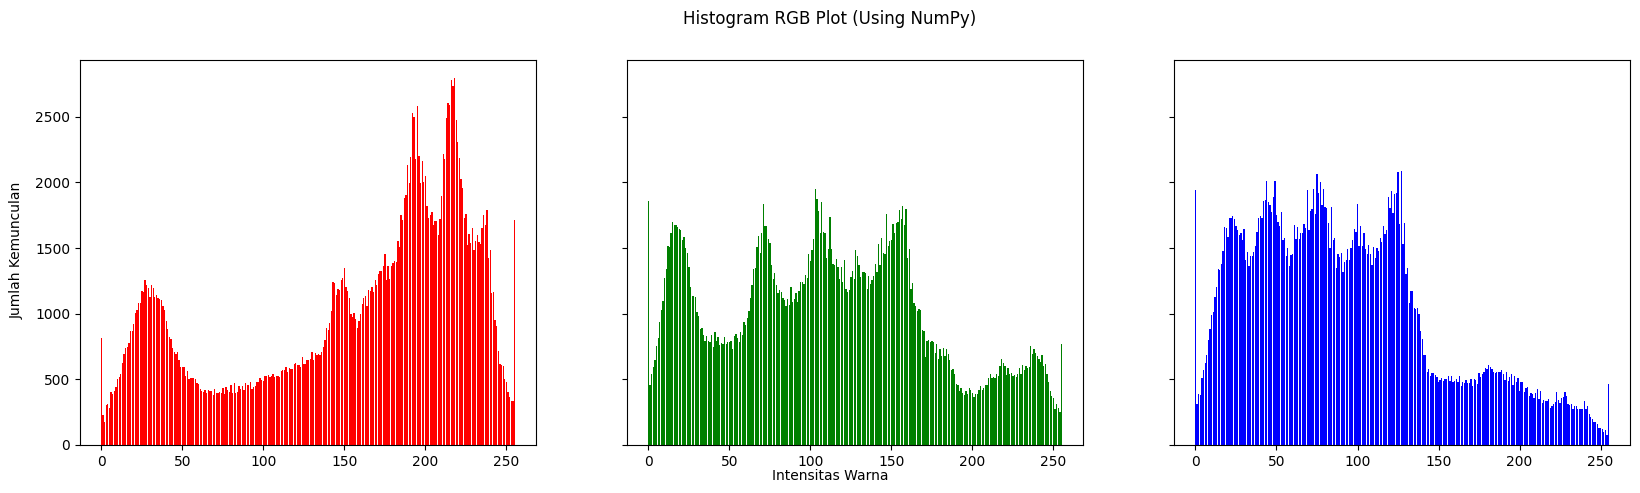

In [15]:
img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Histogram menggunakan numpy
red_hist, bins = np.histogram(img[:, :, 0].ravel(), bins=256, range=(0, 256))
green_hist, bins = np.histogram(img[:, :, 1].ravel(), bins=256, range=(0, 256))
blue_hist, bins = np.histogram(img[:, :, 2].ravel(), bins=256, range=(0, 256))

# Bentuk histogram
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot (Using NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')
plt.show()

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

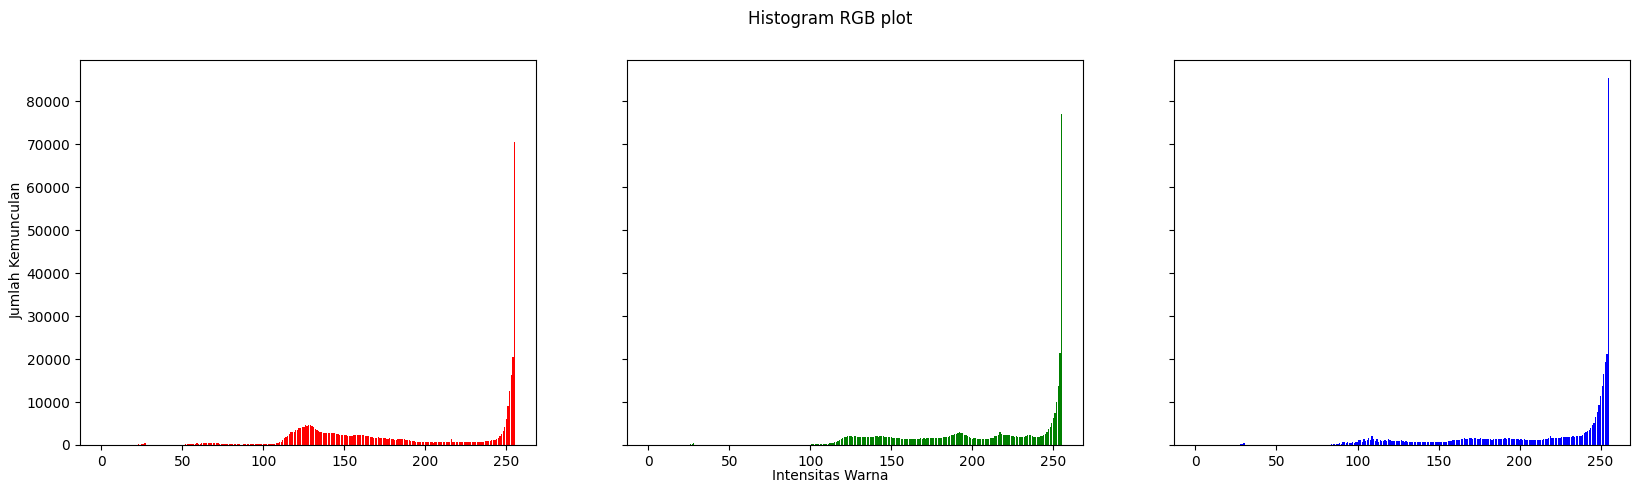

In [35]:
#membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTM.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')
plt.show()

# D-2 PERCOBAAN HISTOGRAM EQUALIZATION

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

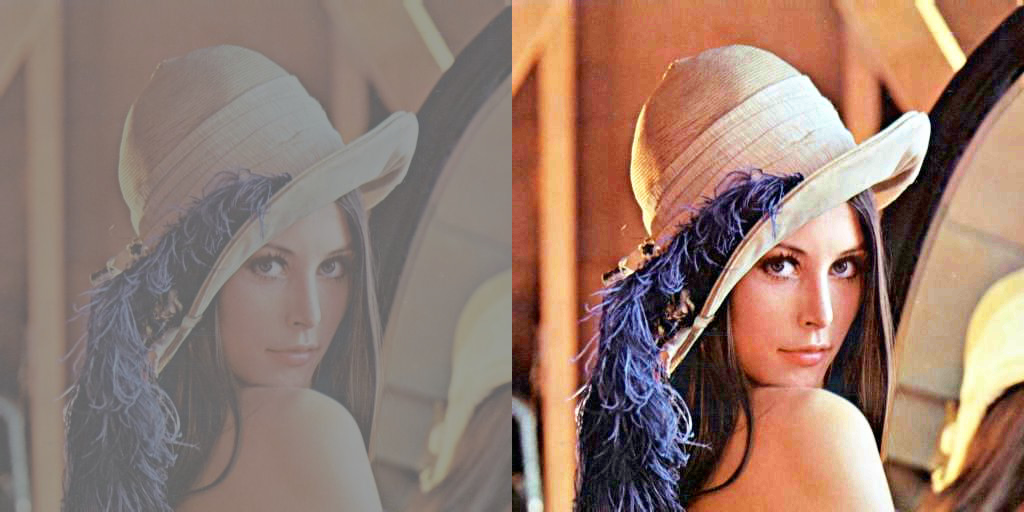

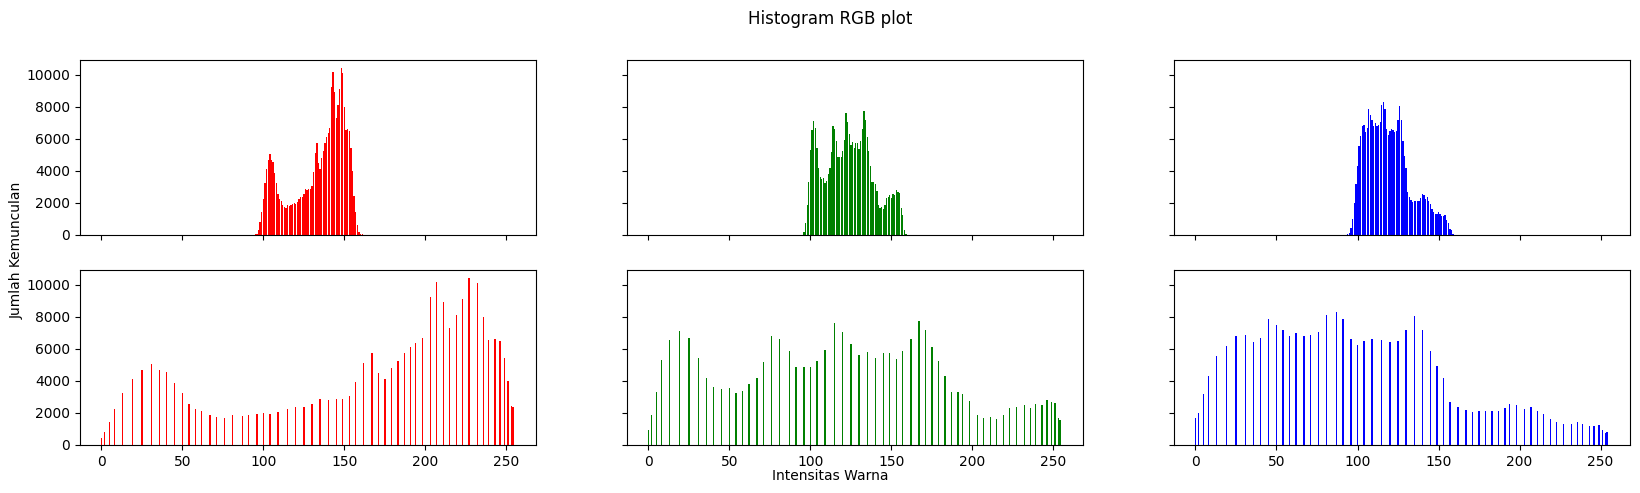

In [18]:
img1 = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

img_array = np.asarray(img1)

#menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi) dgn histogram array
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#histogram_array yang telah mengalami penjumlahan akan dinormalisasi dengan cara membaginya
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
chistogram_array = np.cumsum(histogram_array)

#implementasi rumus K0 (skala warna) setelah pembagian dengan nilai piksel sebelumnya
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Menampilkan hasil Histogram Equalization
# flatten image array into 10 list
img_list = list(img_array.flatten())

# tranformasi value pixel ke equalize
eq_img_list = [transform_map[p] for p in img_list]

# transformasi kembali dalam bentuk citra
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# tampilan citra hasil Histogram Equalization dan histogram sebelum dan sesudah proses Histogram Equalization
equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


 2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada
potongan kode berikut ini.

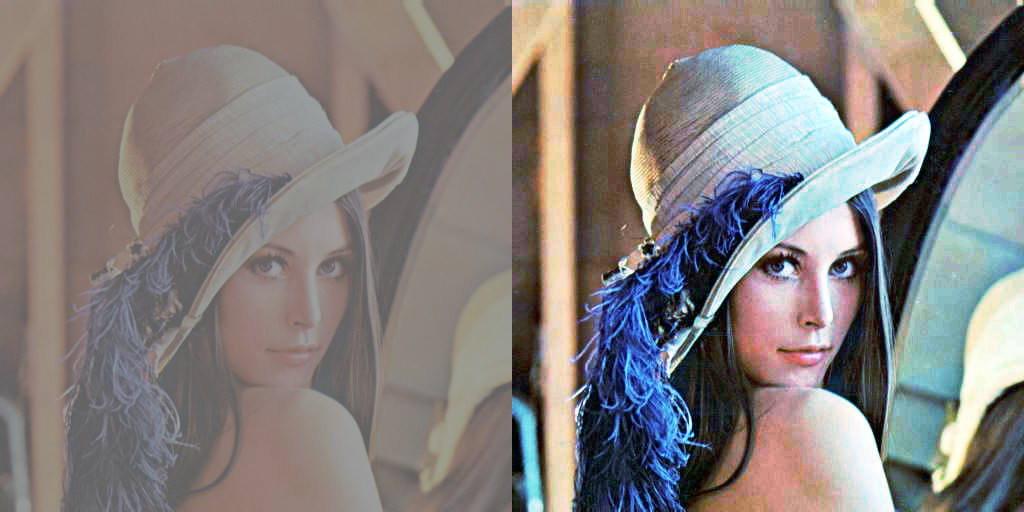

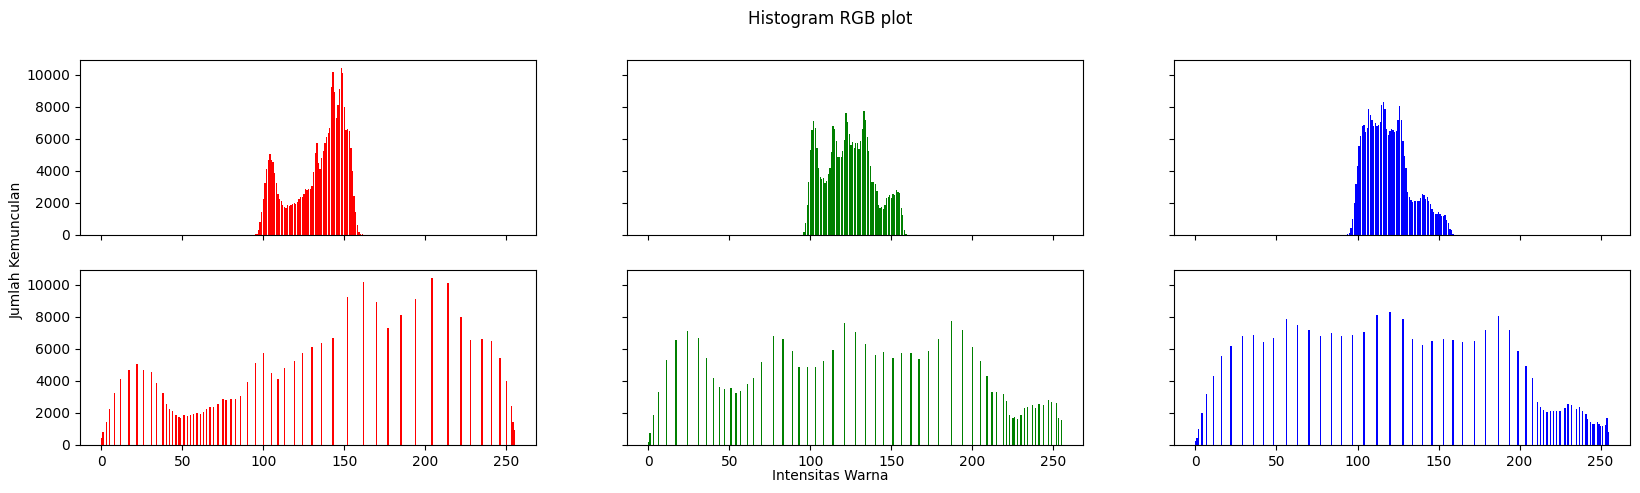

In [21]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena_lc.jpg')

# Split channel
b, g, r = cv.split(img1)

# Equalize tiap channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan hasil equalized
eq_image = cv.merge((b_equalized, g_equalized, r_equalized))

# Tampilkan perbandingan gambar asli vs equalized
final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

# Hitung histogram sebelum dan sesudah
histo_asli = [cv.calcHist([b],[0],None,[256],[0,256]),
              cv.calcHist([g],[0],None,[256],[0,256]),
              cv.calcHist([r],[0],None,[256],[0,256])]

equal_histo = [cv.calcHist([b_equalized],[0],None,[256],[0,256]),
               cv.calcHist([g_equalized],[0],None,[256],[0,256]),
               cv.calcHist([r_equalized],[0],None,[256],[0,256])]

# Plot histogram RGB (atas: sebelum, bawah: sesudah)
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Sebelum equalization
axs[0,0].bar(names, histo_asli[2].ravel(), color='red')
axs[0,1].bar(names, histo_asli[1].ravel(), color='green')
axs[0,2].bar(names, histo_asli[0].ravel(), color='blue')

# Sesudah equalization
axs[1,0].bar(names, equal_histo[2].ravel(), color='red')
axs[1,1].bar(names, equal_histo[1].ravel(), color='green')
axs[1,2].bar(names, equal_histo[0].ravel(), color='blue')

plt.show()


**Penjelasan**: Kode #1 dan Kode #2 melakukan Histogram Equalization dan menampilkan hasilnya menggunakan dua pendekatan yang berbeda.

**Kode #1** mengimplementasikan Histogram Equalization secara manual. Adanya proses normalisasi sehingga tampilan histogram berjarak.

**Kode #2** menggunakan fungsi cv.equalizeHist yang disediakan oleh OpenCV dan dilakukan secara otomatis.

# PERTANYAAN PRAKTIKUM D2

1. Perbandingan Citra Lena

a. Gunakan hasil histogram equalization pada citra lena.jpg.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

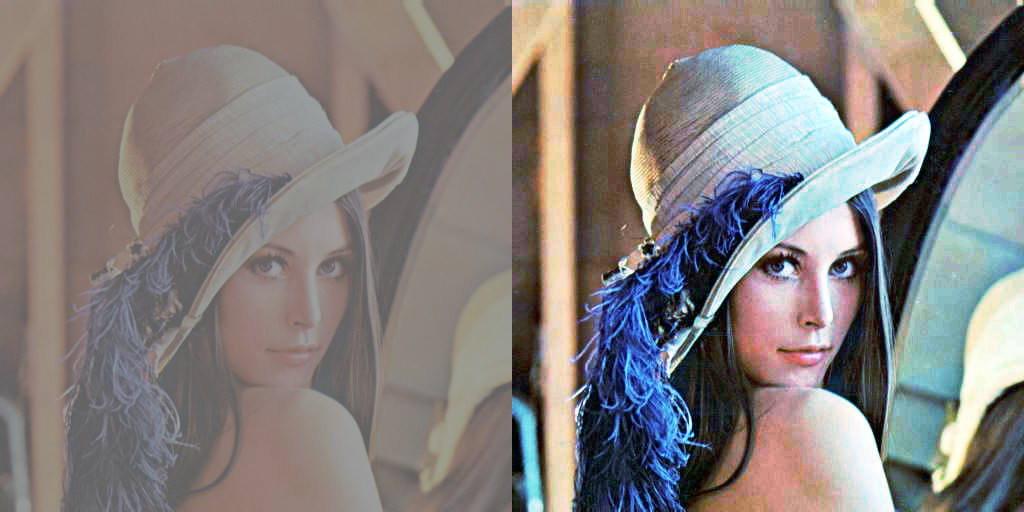

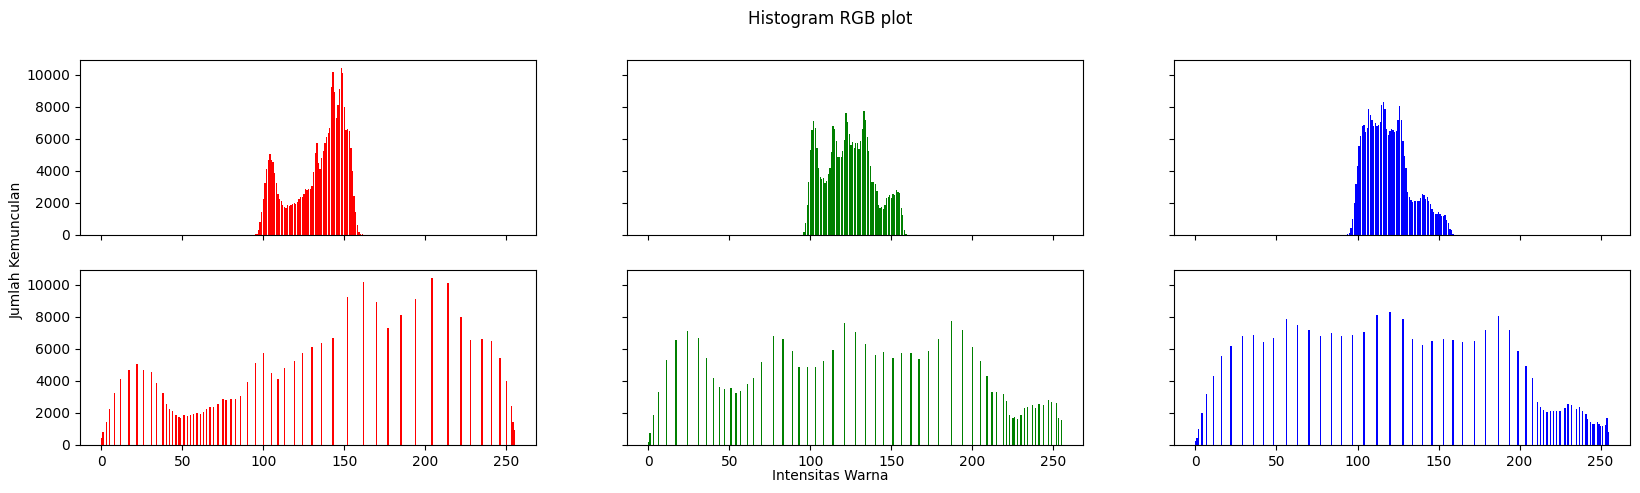

Nilai PSNR antara citra asli dan citra equalization: 12.662449213113602 dB


In [24]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena_lc.jpg')

# Split channel
b, g, r = cv.split(img1)

# Equalize tiap channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan hasil equalized
eq_image = cv.merge((b_equalized, g_equalized, r_equalized))

# Tampilkan perbandingan gambar asli vs equalized
final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

# Hitung histogram sebelum dan sesudah
histo_asli = [cv.calcHist([b],[0],None,[256],[0,256]),
              cv.calcHist([g],[0],None,[256],[0,256]),
              cv.calcHist([r],[0],None,[256],[0,256])]

equal_histo = [cv.calcHist([b_equalized],[0],None,[256],[0,256]),
               cv.calcHist([g_equalized],[0],None,[256],[0,256]),
               cv.calcHist([r_equalized],[0],None,[256],[0,256])]

# Plot histogram RGB (atas: sebelum, bawah: sesudah)
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Sebelum equalization
axs[0,0].bar(names, histo_asli[2].ravel(), color='red')
axs[0,1].bar(names, histo_asli[1].ravel(), color='green')
axs[0,2].bar(names, histo_asli[0].ravel(), color='blue')

# Sesudah equalization
axs[1,0].bar(names, equal_histo[2].ravel(), color='red')
axs[1,1].bar(names, equal_histo[1].ravel(), color='green')
axs[1,2].bar(names, equal_histo[0].ravel(), color='blue')

plt.show()

import math

# Fungsi PSNR
def psnr(img1, img2):
    # Pastikan citra memiliki tipe float
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika tidak ada perbedaan, PSNR maksimum
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# Hitung PSNR
psnr_value = psnr(img1, eq_image)
print("Nilai PSNR antara citra asli dan citra equalization:", psnr_value, "dB")


**Nilai PSNR** yang dihasilkan cukup rendah yaitu 12.662449213113602 dB. karena pemerataan histogram mengubah distribusi intensitas piksel secara signifikan untuk meningkatkan kontras, sehingga perbedaan piksel antara citra asli dan citra yang diperataan cukup besar.

**Arti nilai terhadap kualitas citra** yang rendah tidak berarti kualitas buruk. Dalam konteks pemerataan histogram, PSNR mengukur perbedaan piksel, bukan persepsi kualitas. Citra yang diperataan biasanya memiliki kontras yang lebih baik, membuat detail yang sebelumnya tersembunyi (misalnya, di area gelap atau terang) menjadi lebih jelas.

**Ada detail baru yang muncul** setelah pemerataan histogram, Proses ini menyebarkan intensitas warna secara merata, sehingga area yang sebelumnya datar (misalnya, latar belakang atau bayangan di wajah pada lena_lc.jpg) dapat menunjukkan tekstur atau garis halus yang sebelumnya tidak terlihat. Anda bisa memperhatikan perubahan ini pada citra yang ditampilkan atau membandingkan histogram: histogram asli menunjukkan puncak (konsentrasi intensitas), sedangkan histogram setelah pemerataan lebih merata, menandakan penggunaan rentang intensitas yang lebih luas.


2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

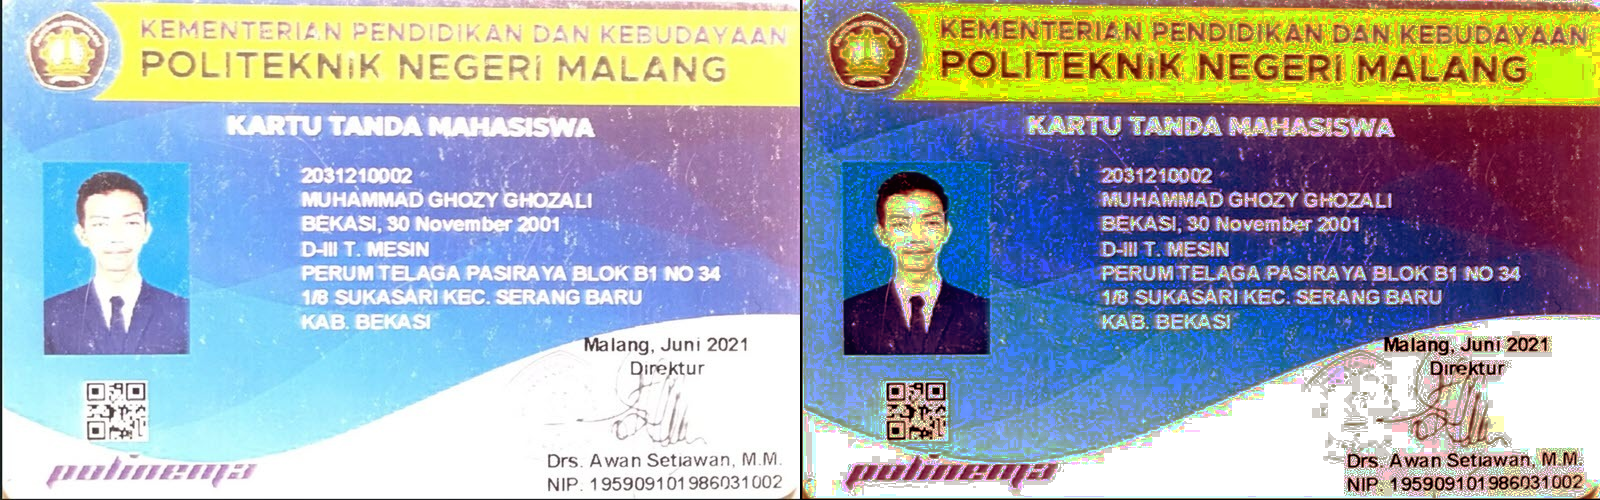

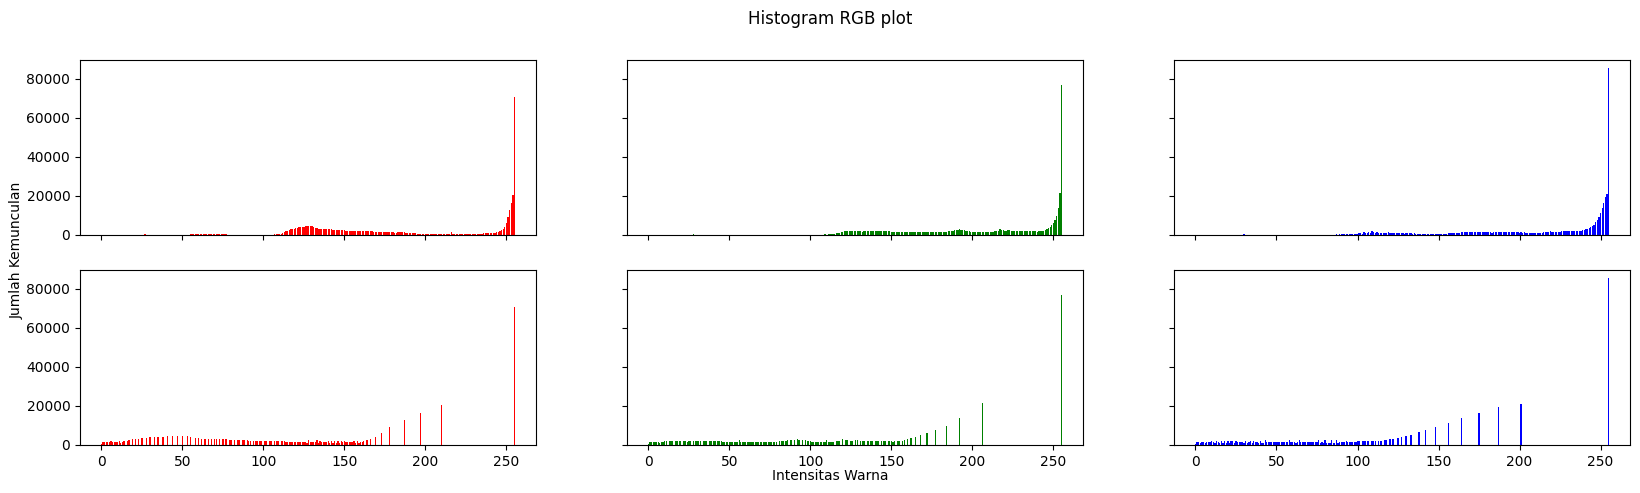

In [26]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/KTM.jpg')

# Split channel
b, g, r = cv.split(img1)

# Equalize tiap channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan hasil equalized
eq_image = cv.merge((b_equalized, g_equalized, r_equalized))

# Tampilkan perbandingan gambar asli vs equalized
final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

# Hitung histogram sebelum dan sesudah
histo_asli = [cv.calcHist([b],[0],None,[256],[0,256]),
              cv.calcHist([g],[0],None,[256],[0,256]),
              cv.calcHist([r],[0],None,[256],[0,256])]

equal_histo = [cv.calcHist([b_equalized],[0],None,[256],[0,256]),
               cv.calcHist([g_equalized],[0],None,[256],[0,256]),
               cv.calcHist([r_equalized],[0],None,[256],[0,256])]

# Plot histogram RGB (atas: sebelum, bawah: sesudah)
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Sebelum equalization
axs[0,0].bar(names, histo_asli[2].ravel(), color='red')
axs[0,1].bar(names, histo_asli[1].ravel(), color='green')
axs[0,2].bar(names, histo_asli[0].ravel(), color='blue')

# Sesudah equalization
axs[1,0].bar(names, equal_histo[2].ravel(), color='red')
axs[1,1].bar(names, equal_histo[1].ravel(), color='green')
axs[1,2].bar(names, equal_histo[0].ravel(), color='blue')

plt.show()


**Perbandingan citra KTM lama sebelum dan sesudan histogram equalization pada**

*   detail wajah: sebelum di equalization Detail wajah mungkin kurang jelas, terutama jika pencahayaan tidak merata (misalnya, area gelap di bawah mata atau bayangan pada dahi). Kontras mungkin rendah, membuat tekstur kulit kurang terdefinisi. setelah di equalization Kontras meningkat, sehingga detail seperti tekstur kulit, garis halus di wajah, atau bayangan menjadi lebih terlihat. Namun, jika citra asli sudah cukup terang, wajah bisa terlihat lebih "keras" atau overexposed di beberapa area.

**Evaluasi kualitas informasi**
Secara umum, equalization meningkatkan kualitas informasi dengan membuat detail lebih terlihat, terutama pada citra dengan kontras rendah. Namun, jika citra asli sudah baik, perubahan bisa berlebihan dan mengurangi keaslian visual.



# D-3 TUGAS PRAKTIKUM DITHERING

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

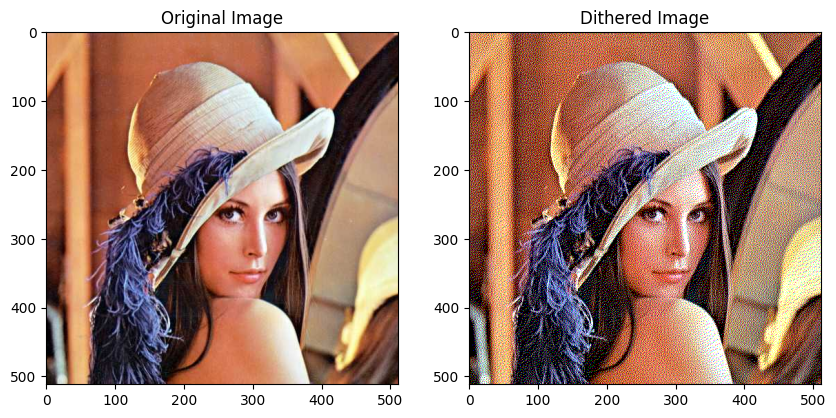

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena.jpg')

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Floyd-Steinberg dithering per channel
def floyd_steinberg_dithering_channel(image_channel):
    image_channel = image_channel.astype(np.float32)
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

# Split channels
b, g, r = cv2.split(img)

# Apply dithering
dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

# Gabungkan kembali
dithered_img = cv2.merge((dithered_b, dithered_g, dithered_r)).astype(np.uint8)

# Tampilan dithered image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
plt.title('Dithered Image')

plt.show()


2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

Gambar Perbandingan


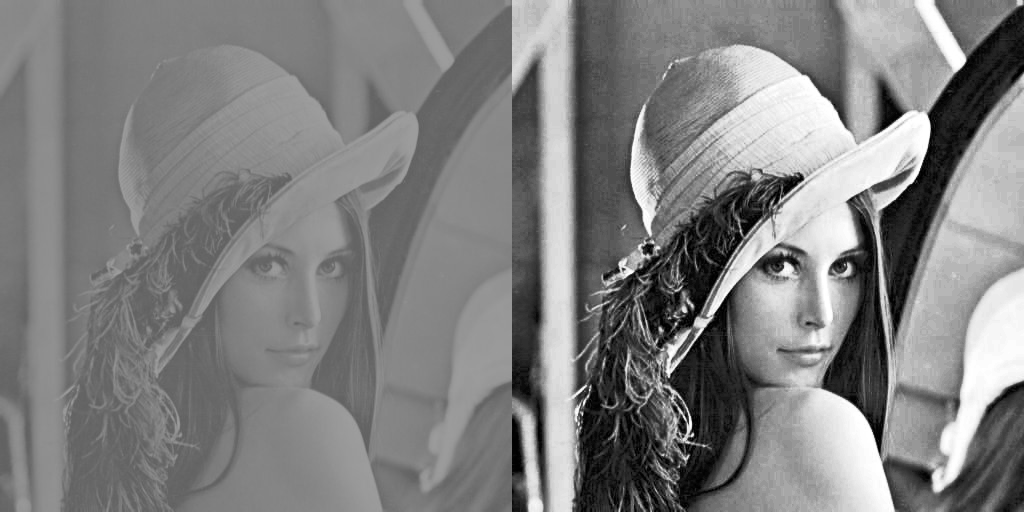

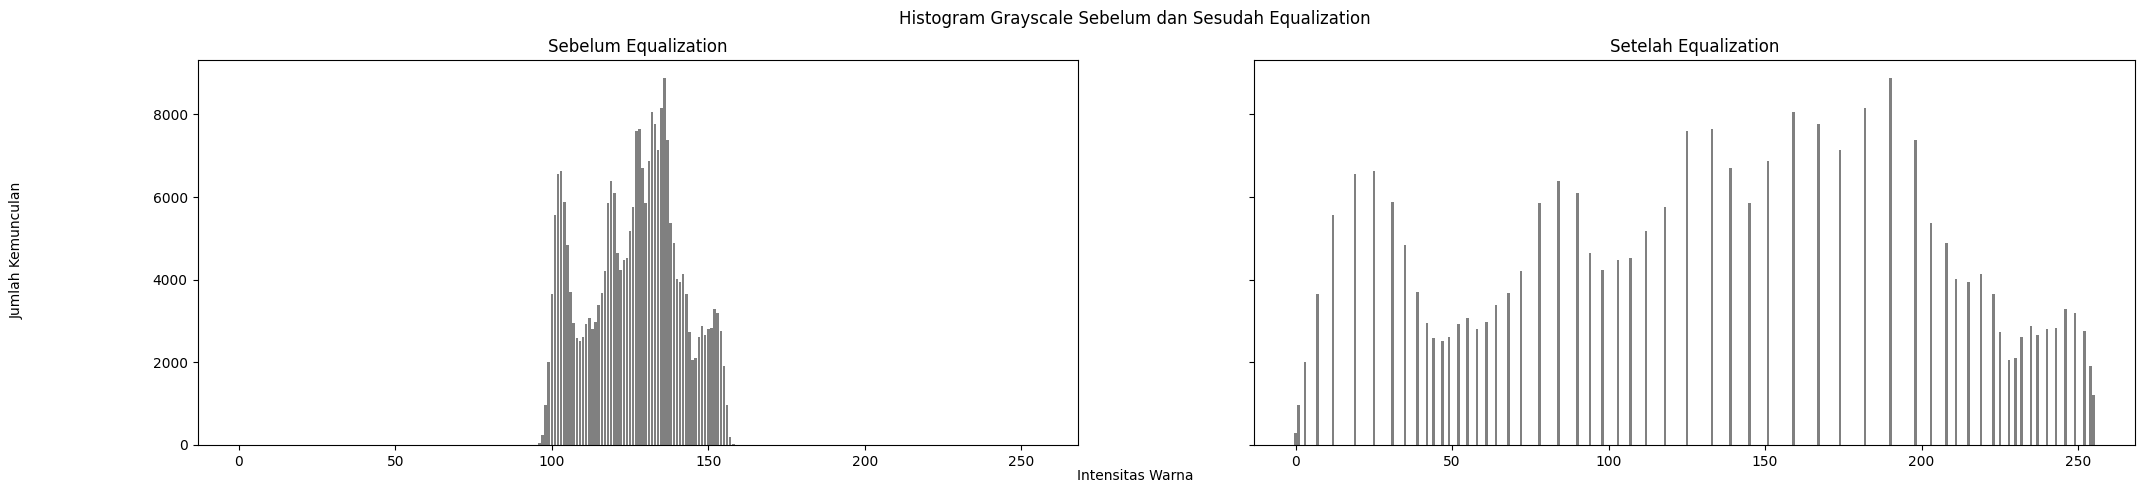

 
Gambar Dithering Floyd and Steinberg


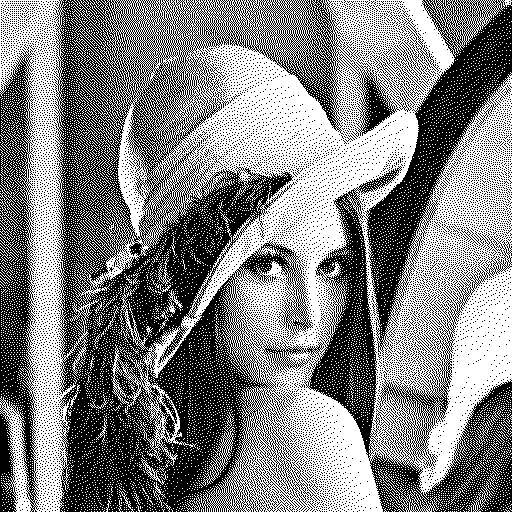

In [30]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/KELAS 3/PCVK/TUGAS/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv2.equalizeHist(img)

# Terapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

# Menggabungkan gambar asli dan gambar setelah histogram equalization
final_frame = cv2.hconcat((img, equalized_img))

# Menampilkan hasil gabungan
print('Gambar Perbandingan')
cv2_imshow(final_frame)

# Melakukan Histogram Equalization
equalized_img = cv2.equalizeHist(img)

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
names = np.arange(256)

# Menghitung jumlah kemunculan setiap pixel sebelum dan sesudah equalization
hist_before = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_after = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Membuat subplot untuk histogram sebelum dan sesudah equalization
fig, axs = plt.subplots(1, 2, figsize=[25, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale Sebelum dan Sesudah Equalization')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Plot histogram sebelum equalization
axs[0].bar(names, hist_before[:, 0], color='gray')
axs[0].set_title('Sebelum Equalization')

# Plot histogram setelah equalization
axs[1].bar(names, hist_after[:, 0], color='gray')
axs[1].set_title('Setelah Equalization')

plt.show()


print(' ')

print('Gambar Dithering Floyd and Steinberg')
cv2_imshow(output_img)
plt.show()